In [1]:
#Gempy_Mesh
# import panel
import gempy as gp
import gempy_viewer as gpv
import pickle
import vtk
import rasterio
import pyevtk
from discretize import TensorMesh
from discretize.utils import mkvc, active_from_xyz
from scipy.interpolate import LinearNDInterpolator
from SimPEG import maps
from SimPEG.potential_fields import gravity
from SimPEG import discretize
# import emg3d

from gempy.core.data import GeoModel
from gempy.core.data import Grid
from gempy.core.data.grid_modules import RegularGrid
# from PyQt6 import QtWidgets, QtGui

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, time
import pyvista as pv
from gempy_engine.core.data.stack_relation_type import StackRelationType


np.random.seed(55500)

Setting Backend To: AvailableBackends.numpy


In [2]:
nx, ny, nz= 80, 80, 80
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Model1',
    extent=[853610.2891, 855569.4948, 
            987530.5888, 988420.4712, 
            -6600, 3000], #x, y, z
    resolution=[nx, ny, nz],
    refinement=4, # We will use octrees
    importer_helper= gp.data.ImporterHelper(
        # path_to_orientations= "model_fault_orientation1.csv",
        # path_to_surface_points= "model_fault_points.csv",
        path_to_orientations= "model_fault_orientation1.csv",
        path_to_surface_points= "model_fault_points.csv",

    )
)

In [3]:
geo_model.surface_points_copy

X,Y,Z,id,nugget
853614.29,988145.94,1168.10,55536322,0.00
853669.46,988145.94,972.31,55536322,0.00
853771.51,988145.94,583.56,55536322,0.00
853912.88,988145.94,432.56,55536322,0.00
853976.38,988145.94,411.39,55536322,0.00
854161.07,988145.94,446.91,55536322,0.00
854284.93,988145.94,414.28,55536322,0.00
854336.21,988145.94,236.77,55536322,0.00
854391.78,988145.94,287.40,55536322,0.00
854447.34,988145.94,291.70,55536322,0.00


In [4]:
geo_model.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
853699.02,988145.94,859.69,0.77,0.00,0.64,55536322,0.01
853875.78,988145.94,465.20,0.62,0.00,0.79,55536322,0.01
854173.09,988145.94,450.07,0.29,0.00,0.96,55536322,0.01
854502.90,988145.94,307.75,0.07,0.00,1.00,55536322,0.01
854745.44,988145.94,316.99,0.14,0.00,0.99,55536322,0.01
855018.79,988145.94,69.68,0.15,0.00,0.99,55536322,0.01
855114.09,988145.94,189.14,-0.28,-0.00,0.96,55536322,0.01
855187.47,988145.94,284.85,-0.41,-0.00,0.91,55536322,0.01
855424.03,988145.94,230.34,-0.34,-0.00,0.94,55536322,0.01
855545.16,988145.94,461.85,-0.34,-0.00,0.94,55536322,0.01


In [5]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
),
Element(
	name=Edificio_Volcanico,
	color=#9f0052,
	is_active=True
),
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
),
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [6]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series1": ('Edificio_Volcanico'),     
        "Strat_Series2": ('Complejo_Dacitico'),
        "Strat_Series3": ('Flujo_Piroclastico', 'Sucesion_Piroclastica', 'Sucesion_Volcanica')
    }
)
geo_model.structural_frame  # Display the resulting structural frame


StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Edificio_Volcanico,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series3,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
),
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False],
 [False, False, False],
 [False, False, False]],

C:\Users\gabri\anaconda3\envs\volcan\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


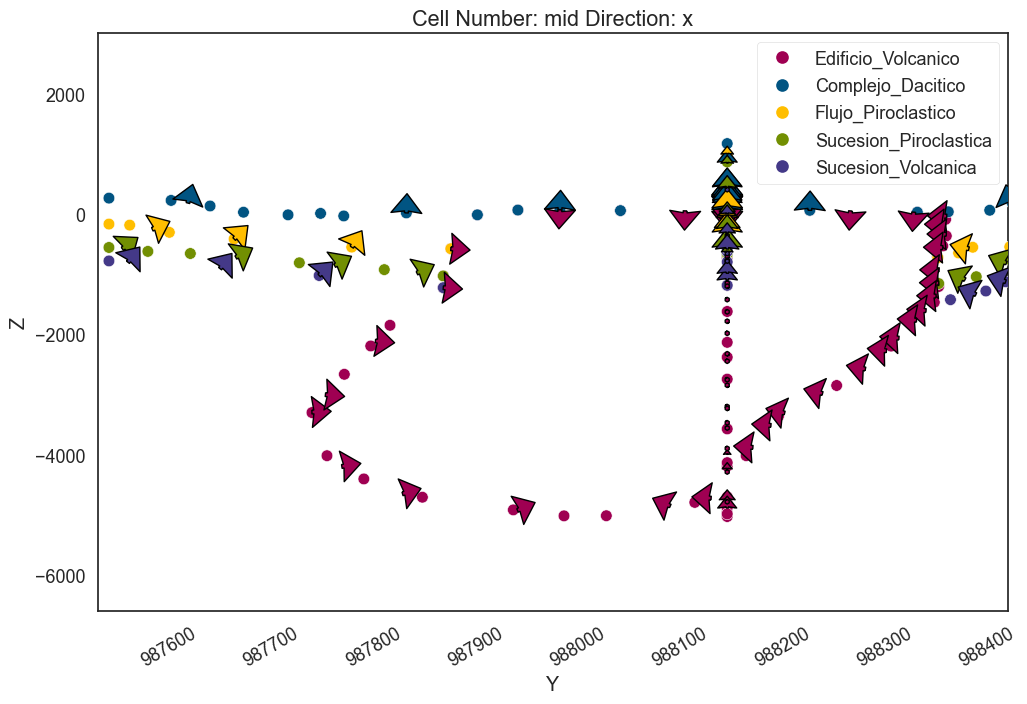

In [7]:
plot = gpv.plot_2d(geo_model, show_lith=False, show_boundaries=False, direction='x')

Active grids: GridTypes.NONE|TOPOGRAPHY|DENSE


C:\Users\gabri\anaconda3\envs\volcan\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


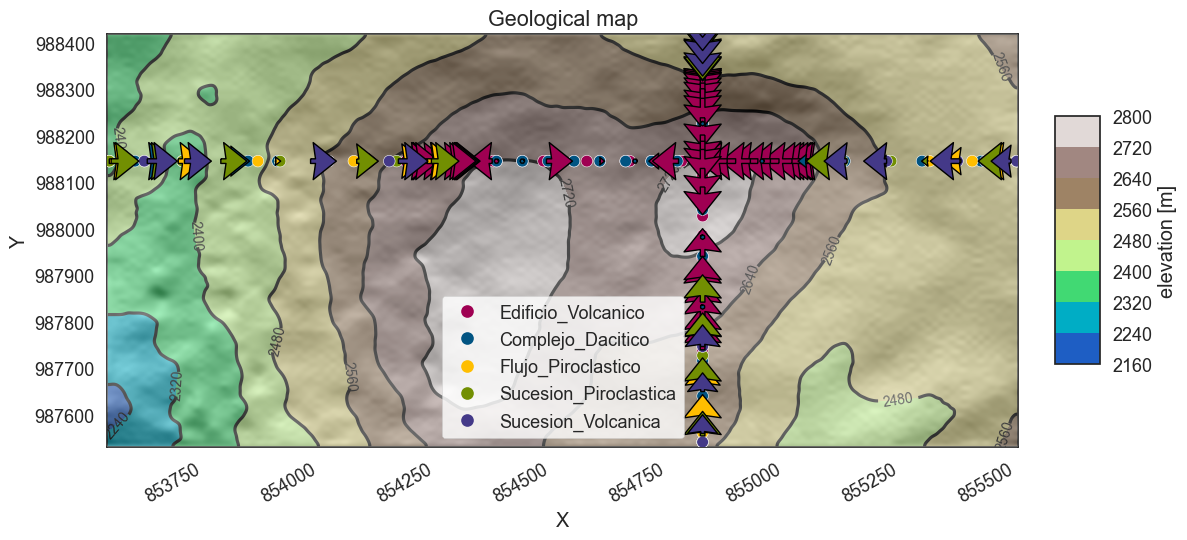

In [8]:
gp.set_topography_from_file(
    grid=geo_model.grid,
    filepath=os.path.join("DEM_VCM_dm.tif"),
)

gpv.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_data=True)

In [9]:
geo_model.grid

Grid(values=array([[853622.53413562, 987536.150565  ,  -6540.        ],
       [853622.53413562, 987536.150565  ,  -6420.        ],
       [853622.53413562, 987536.150565  ,  -6300.        ],
       ...,
       [855584.37880337, 988610.42542455,   2579.        ],
       [855584.37880337, 988623.06431344,   2583.        ],
       [855584.37880337, 988635.70320233,   2586.        ]]), length=array([], dtype=float64), _octree_grid=None, _dense_grid=RegularGrid(resolution=array([80, 80, 80]), extent=array([853610.2891, 855569.4948, 987530.5888, 988420.4712,  -6600.    ,
         3000.    ]), values=array([[853622.53413562, 987536.150565  ,  -6540.        ],
       [853622.53413562, 987536.150565  ,  -6420.        ],
       [853622.53413562, 987536.150565  ,  -6300.        ],
       ...,
       [855557.24976438, 988414.909435  ,   2700.        ],
       [855557.24976438, 988414.909435  ,   2820.        ],
       [855557.24976438, 988414.909435  ,   2940.        ]]), mask_topo=array([], shap

In [10]:
# geo_model.interpolation_options

In [11]:
geo_model.solutions

In [12]:
geo_model.input_transform.apply_anisotropy(gp.data.GlobalAnisotropy.NONE)
geo_model.interpolation_options.kernel_options.range *= 3.2
# geo_model.interpolation_options.kernel_options.compute_condition_number = True
geo_model.interpolation_options.evaluation_options.evaluation_chunk_size = 500_000

gp.compute_model(
    gempy_model=geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH
    )
)

Setting Backend To: AvailableBackends.PYTORCH
Chunking done: 281 chunks
Chunking done: 113 chunks
Chunking done: 272 chunks
Chunking done: 13 chunks
Chunking done: 12 chunks


Solutions(4 Octree Levels, 5 DualContouringMeshes)

In [13]:
gpv.plot_3d(model=geo_model,
            plotter_type='basic',
            # kwargs_plot_structured_grid={'opacity': .1},
            show_surfaces=True,
            show_topography=True,
            show_data=False,
            show_lith=False,
            image=False,
            legend=True,
            ve=1
            )

In [14]:
gpv.plot_3d(model=geo_model)

In [15]:
# link = gpv.plot_to_liquid_earth(
#     geo_model=geo_model,
#     space_name="[PUBLIC] GemPy Tutorial 1.7: 3-D Visualization",
#     file_name="gempy_model",
#     user_token="5a31d9c3-79a6-4dfd-b640-fa98c4ea5a58",  # Reemplaza con tu token real
#     grab_link=True,
# )